In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
# 文字化けを防ぐ
import japanize_matplotlib

In [2]:
file_path = '../dataset/house_price_jp.csv'

In [3]:
df = pd.read_csv(file_path, sep=',')

In [4]:
df['Log10_price'] = df['price'].apply(lambda x: np.log10(x))

In [5]:
df['station_dis'] = pd.to_numeric(df['station_dis'], errors='coerce')
df['area'] = pd.to_numeric(df['area'], errors='coerce')
df = df.dropna(subset=['station_dis', 'area'])

<Axes: xlabel='building_year', ylabel='Log10_price'>

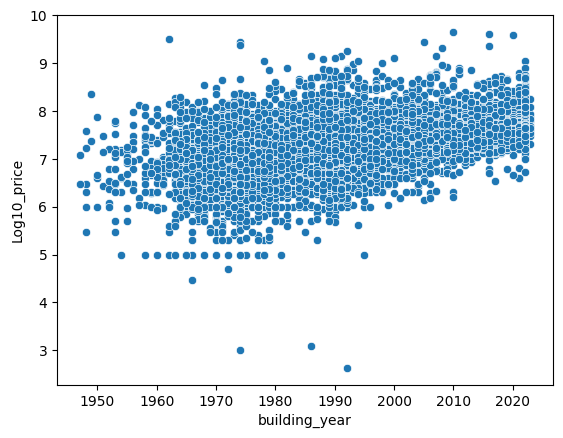

In [6]:
sns.scatterplot(data=df, x='building_year', y='Log10_price')

In [7]:
df['room'].unique()

array(['３ＬＤＫ', '２ＬＤＫ', '１Ｒ', '１ＤＫ', nan, '１ＬＤＫ', '２ＤＫ', '４ＬＤＫ', '１Ｋ',
       '３ＬＤＫ＋Ｓ', '２ＬＤＫ＋Ｓ', '５ＬＤＫ', '１ＬＤＫ＋Ｓ', '３ＤＫ', '４ＤＫ', 'オープンフロア',
       '２Ｋ', '２ＤＫ＋Ｓ', '１ＤＫ＋Ｓ', '３Ｋ', '４ＬＤＫ＋Ｓ', '４Ｋ', '５ＤＫ'], dtype=object)

<Axes: xlabel='building_year', ylabel='Log10_price'>

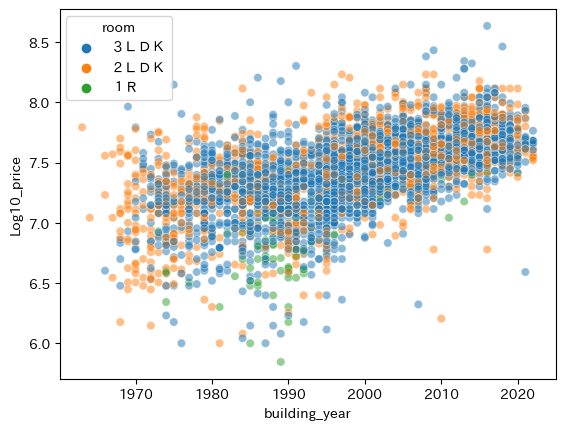

In [12]:
target_room = ["３ＬＤＫ", "２ＬＤＫ", "１Ｒ"]
target_df = df.query('room in @target_room')
sns.scatterplot(data=target_df, x='building_year', y='Log10_price', hue='room', alpha=0.5)

# matplotlibで書くと下記のようになっていた(seabornの方がより簡単に書ける)
# target_df = df.query('room == "３ＬＤＫ"')
# plt.scatter(target_df['building_year'], target_df['Log10_price'], label='3LDK', alpha=0.3)

# target_df = df.query('room == "２ＬＤＫ"')
# plt.scatter(target_df['building_year'], target_df['Log10_price'], label='2LDK', alpha=0.3)

# target_df = df.query('room == "１Ｒ"')
# plt.scatter(target_df['building_year'], target_df['Log10_price'], label='1R', alpha=0.3)
# plt.xlabel('building_year')
# plt.ylabel('Log10 Price')
# # ラベルの表示
# plt.legend()

### jointplot

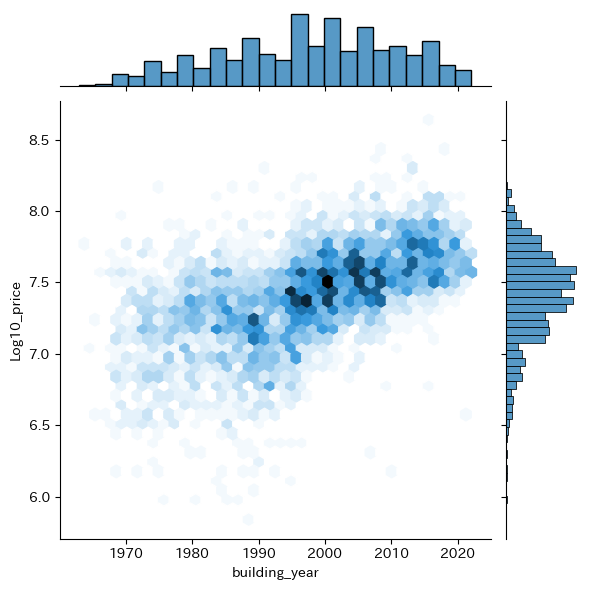

In [13]:
# 外側はヒストグラムを表し、色の濃い部分はデータが密集している
sns.jointplot(data=target_df, x='building_year', y='Log10_price', kind='hex')

### pairplot

In [14]:
# pairplotは重い処理なので、今回は変数を絞る
target_df.select_dtypes(['float64', 'int64']).columns

Index(['index', 'building_year', 'station_dis', 'price', 'price_per_tsubo',
       'area', 'frontage', 'BCR', 'FAR', 'Log10_price'],
      dtype='object')

In [16]:
col_names = ['building_year', 'station_dis', 'area', 'frontage', 'BCR', 'FAR', 'Log10_price'] + ['room']

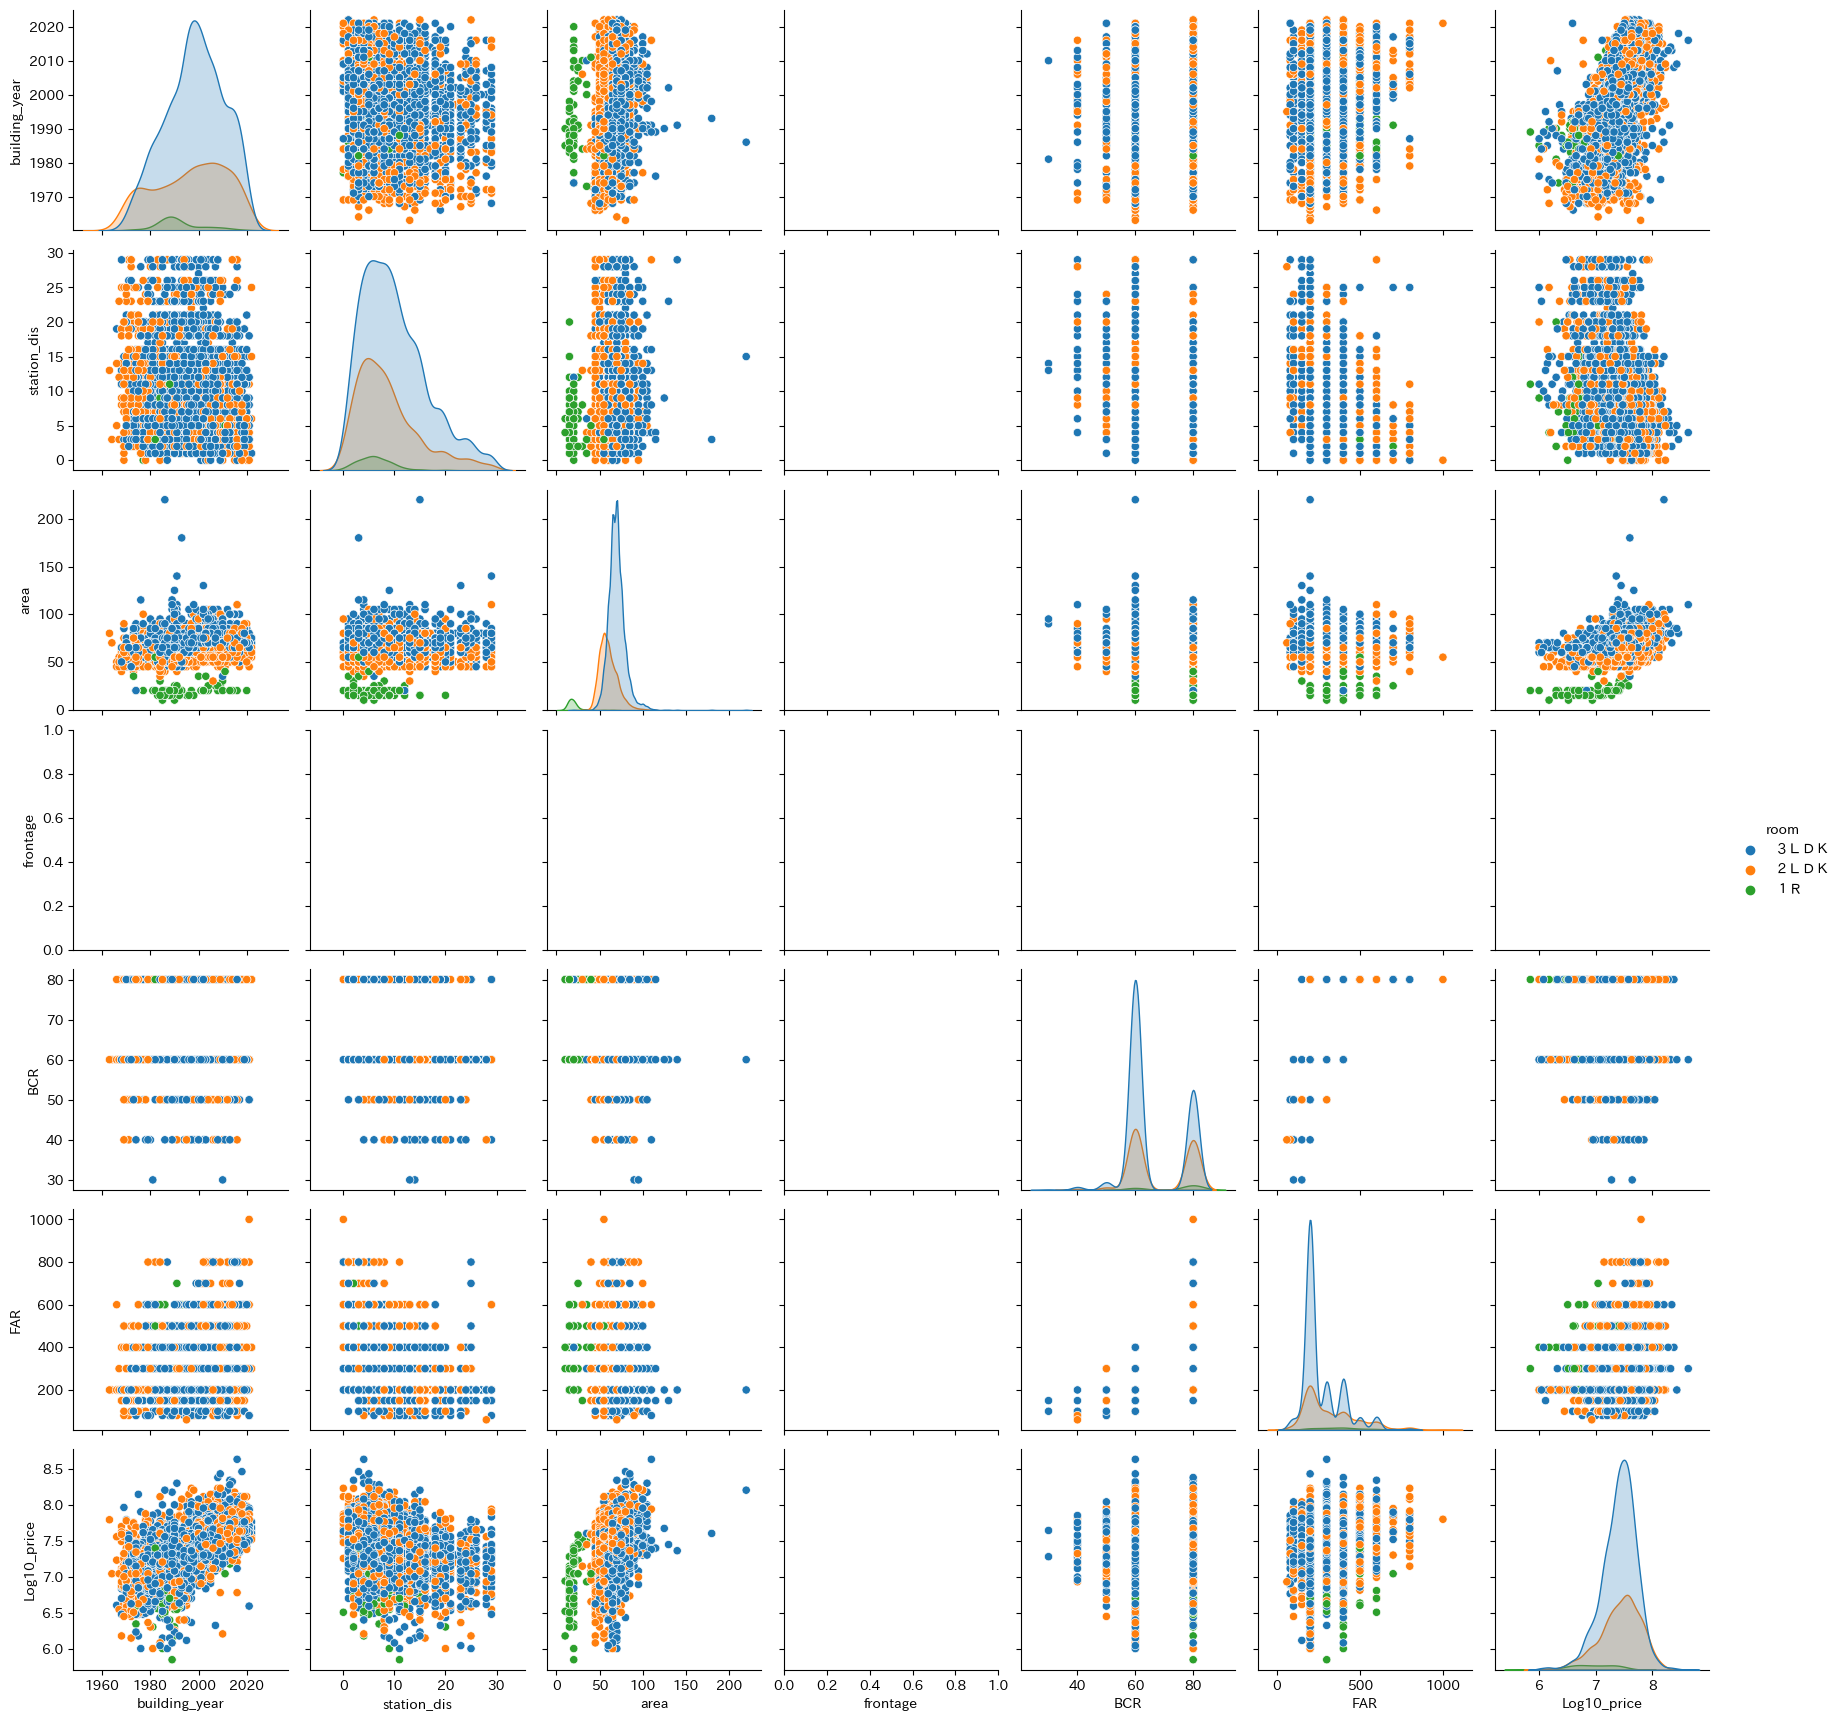

In [17]:
sns.pairplot(data=target_df[col_names], hue='room')